    Таблица visits (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя
    
    Таблица orders (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка
    
    Таблица costs (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

    LTV -  общая сумма денег, которую один клиент в среднем приносит компании (выручка еа текущий день / размер когорты) (1, 3, 7, 14 дней)
    ROI - окупаемость LTV/САС
    САС - стоимость привлечения одного клиента ( Расход на рекламу / размер когорты )
    ARPU - средняя выручка с пользователя 
    ARPPU - средняя выручка с платящего пользователя
    удержание 
    CTR - показов рекламного баннера в клики называют(конверсия клики/показы)
    CR - переход пользователя от одного состояния в другое(конверсия)
    DAU - количество уникальных пользователей за день 
    WAU - количество уникальных пользователей за неделю 
    MAU - количество уникальных пользователей за месяц 
    ASL - Средняя продолжительность сессии 
    CPM -  стоимость тысячи показов рекламного объявления.
    RPM - доход за тысячу показов.
    СPC - оплата за каждого пользователя, кликнувшего на рекламное объявление, то есть перешедшего на сайт.
    CPL - оплата за каждого пользователя, оставившего свои контакты
    CPA - оплата за определённое действие, совершённое пользователем. Например, за покупку.

Загружаем библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем таблицы

In [2]:
job = 'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Проекты\\Продуктовые метрики\\'
home = 'C:\\Users\\Александр\\OneDrive\\Рабочий стол\\Python\\ЯндексПрактикум\\Project\\Продуктовые метрики\\'
try:   
    visits = pd.read_csv(
        job+'visits_info_short.csv'
    )
    
    orders = pd.read_csv(
        job+'orders_info_short.csv'
    )
        
    costs = pd.read_csv(
        job+'costs_info_short.csv'
    )
    
except:
    visits = pd.read_csv(
        home+'visits_info_short.csv'
    )
    orders = pd.read_csv(
        home+'orders_info_short.csv'
    )
    costs = pd.read_csv(
        home+'costs_info_short.csv'
    )
    

Подготовим наши данные к работе

In [3]:
names = ['visits', 'orders', 'costs']
tables = [visits, orders, costs]
for table,name in zip(tables, names):
    print('ТАБЛИЦА: ',name)
    display(table.shape)
    display(table.sample(3))
    table.info()
    print('\n')

ТАБЛИЦА:  visits


(309901, 6)

,User Id,Region,Device,Channel,Session Start,Session End
159213,930407744757,United States,Mac,FaceBoom,2019-09-25 11:31:15,2019-09-25 12:38:06
207169,138466095553,United States,iPhone,organic,2019-10-31 22:45:45,2019-10-31 22:51:14
193603,465610821267,United States,iPhone,organic,2019-10-19 19:09:21,2019-10-19 19:34:08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


ТАБЛИЦА:  orders


(40212, 3)

,User Id,Event Dt,Revenue
23812,267394442856,2019-10-12 17:53:45,4.99
29651,841268939331,2019-06-20 18:53:54,4.99
4324,123643365833,2019-06-21 08:43:10,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


ТАБЛИЦА:  costs


(1800, 3)

,dt,Channel,costs
1159,2019-07-19,LeapBob,8.82
800,2019-07-20,YRabbit,3.78
1228,2019-09-26,LeapBob,12.81


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB




Пропусков нет, проверим данные на дубликаты

In [4]:
for table in tables:
    print(table.duplicated().sum())

0
0
0


Приведем таблицы к удобному для работы виду 

In [5]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [6]:
visits = visits.rename(
    columns = {
        visits.columns[0]:'user_id',
        visits.columns[1]:'region',
        visits.columns[2]:'device',
        visits.columns[3]:'channel',
        visits.columns[4]:'session_start',
        visits.columns[5]:'session_end'
    }
)

orders = orders.rename(
    columns = {
        orders.columns[0]:'user_id',
        orders.columns[1]:'event_dt',
        orders.columns[2]:'revenue',
    }
)

costs = costs.rename(
    columns = {
        costs.columns[0]:'dt',
        costs.columns[1]:'channel',
        costs.columns[2]:'costs',
    }
)

Посчитаем длину сессии пльзователей из таблицы visits

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Преобразуем тип данных

In [8]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [9]:
visits['session_length'] = pd.to_datetime(visits['session_end']) - pd.to_datetime(visits['session_start'])

visits.query('user_id == 267068500935')

,user_id,region,device,channel,session_start,session_end,session_length
110558,267068500935,United States,iPhone,organic,2019-08-16 02:08:57,2019-08-16 02:16:38,0 days 00:07:41
111588,267068500935,United States,iPhone,organic,2019-08-17 13:27:23,2019-08-17 14:15:08,0 days 00:47:45
121264,267068500935,United States,iPhone,organic,2019-08-25 18:45:22,2019-08-25 18:47:31,0 days 00:02:09


    Создадим профиль пользователей
    id, channel, device, region, session start, month, dt, payer, costs, acquisition_cost

In [10]:
# выделяем первое песещение пользователя 
profiles = visits.pivot_table(
    index = 'user_id',
    values = ['session_start', 'channel', 'device', 'region'],
    aggfunc = 'first'
). reset_index().sort_values(by = 'session_start')

# выделяем месяц
profiles['month'] = profiles['session_start'].astype('datetime64[M]')
profiles['dt'] = profiles['session_start'].astype('datetime64[D]')

# является ли платящим(хоть раз платил) клиент или нет(пересечение в таблице orders)
profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) 

# посчитаем стоимость привлечения одного пользователя
acquisition_cost = profiles.pivot_table(index = ['dt','channel'], values = 'user_id', aggfunc = 'nunique').reset_index().merge(
        costs.pivot_table(index = ['dt','channel'], values = 'costs').reset_index(), 
        on = ['dt','channel'],
        how = 'left'
                      ).rename(columns = {'user_id':'count_user_id'})

acquisition_cost['acquisition_cost'] = acquisition_cost['costs']/acquisition_cost['count_user_id']

profiles = profiles.merge(acquisition_cost, on=['dt','channel'], how='left')

profiles = profiles.merge(
    orders.pivot_table(index='user_id', 
                       values='revenue', 
                       aggfunc='sum').reset_index(), on=['user_id'], how='left') 

In [11]:
profiles.query('user_id == 329994900775')

,user_id,channel,device,region,session_start,month,dt,payer,count_user_id,costs,acquisition_cost,revenue
149712,329994900775,LeapBob,PC,UK,2019-10-27 18:17:40,2019-10-01,2019-10-27,True,58,12.81,0.220862,9.98


Рассмотрим наших пользователей по регионам

1 вариант

2 вариант

In [12]:
z = profiles.pivot_table(index=['region', 'device', 'channel', 'month', ], values='payer', aggfunc=['count', 'sum']).reset_index()
z['%_payer'] = round(z[('sum','payer')]/z[('count','payer')]*100, 1)
z['%_count_all'] = round(z[('count','payer')]/z[('count','payer')].sum()*100, 1)
z.head()

,region,device,channel,month,count,sum,%_payer,%_count_all
,,,,,payer,payer,,
0,France,Android,AdNonSense,2019-05-01,123,12,9.8,0.1
1,France,Android,AdNonSense,2019-06-01,61,10,16.4,0.0
2,France,Android,AdNonSense,2019-07-01,56,4,7.1,0.0
3,France,Android,AdNonSense,2019-08-01,64,7,10.9,0.0
4,France,Android,AdNonSense,2019-09-01,44,5,11.4,0.0


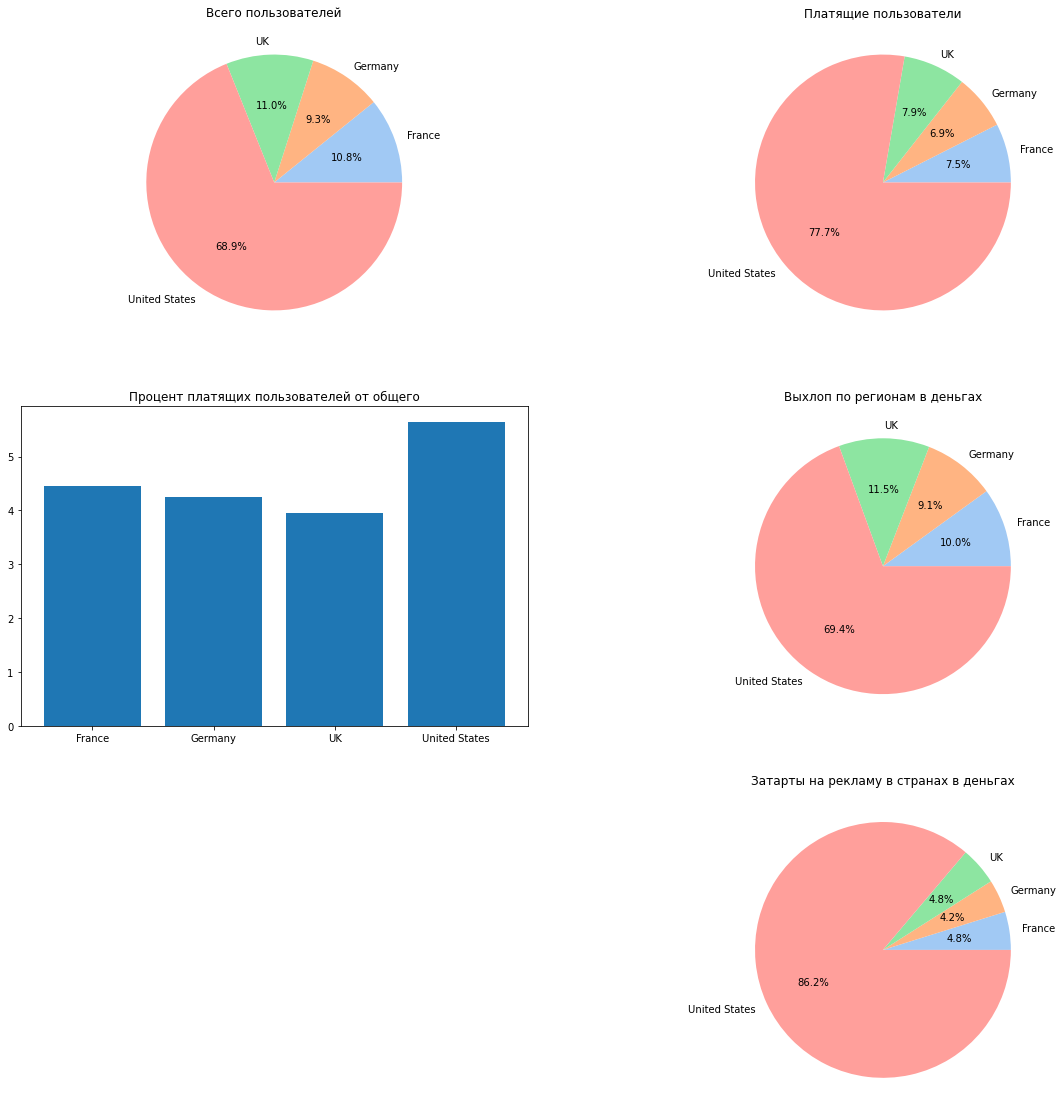

In [52]:
fig = plt.figure(figsize=(20,20))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(3,2,1)
plt.pie(
    x = z.groupby('region')['%_count_all'].sum(),
    labels = z['region'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(3,2,2)
plt.pie(
    x = z.pivot_table(index='region', values=z.columns[5][0], aggfunc='sum').reset_index()['payer'],
    labels = z.pivot_table(index='region', values=z.columns[5][0], aggfunc='sum').reset_index()['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax3 = fig.add_subplot(3,2,3)
plt.bar(
    x = z.pivot_table(index='region', values=z.columns[6][0], aggfunc='sum').reset_index()['region'],
    height = z.pivot_table(index='region', values=z.columns[6][0], aggfunc='median').reset_index()['']
)
plt.title('Процент платящих пользователей от общего')

ax4 = fig.add_subplot(3,2,4)
plt.pie(
    x = profiles.pivot_table(index='region', values='revenue', aggfunc='sum').reset_index()['revenue'],
    labels = profiles.pivot_table(index='region', values='revenue', aggfunc='sum').reset_index()['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Выхлоп по регионам в деньгах')

ax5 = fig.add_subplot(3,2,6)
plt.pie(
    x = profiles.pivot_table(index='region', values='acquisition_cost', aggfunc='sum').reset_index()['acquisition_cost'],
    labels = profiles.pivot_table(index='region', values='acquisition_cost', aggfunc='sum').reset_index()['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Затарты на рекламу в странах в деньгах')


plt.show()

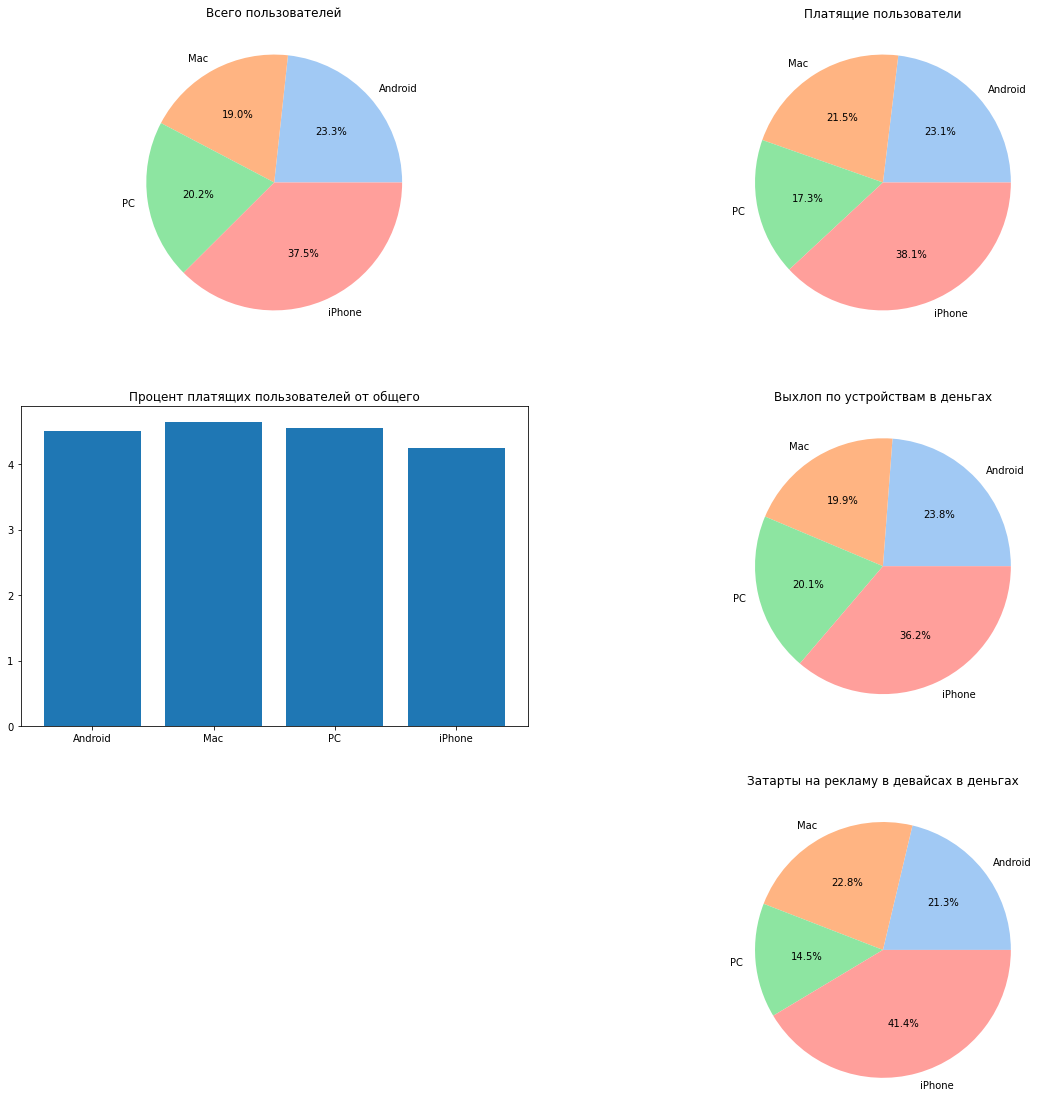

In [49]:
fig = plt.figure(figsize=(20,20))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(3,2,1)
plt.pie(
    x = z.groupby('device')['%_count_all'].sum(),
    labels = z['device'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(3,2,2)
plt.pie(
    x = z.pivot_table(index='device', values=z.columns[5][0], aggfunc='sum').reset_index()['payer'],
    labels = z.pivot_table(index='device', values=z.columns[5][0], aggfunc='sum').reset_index()['device'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax3 = fig.add_subplot(3,2,3)
plt.bar(
    x = z.pivot_table(index='device', values=z.columns[6][0], aggfunc='sum').reset_index()['device'],
    height = z.pivot_table(index='device', values=z.columns[6][0], aggfunc='median').reset_index()['']
)
plt.title('Процент платящих пользователей от общего')

ax4 = fig.add_subplot(3,2,4)
plt.pie(
    x = profiles.pivot_table(index='device', values='revenue', aggfunc='sum').reset_index()['revenue'],
    labels = profiles.pivot_table(index='device', values='revenue', aggfunc='sum').reset_index()['device'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Выхлоп по устройствам в деньгах')

ax5 = fig.add_subplot(3,2,6)
plt.pie(
    x = profiles.pivot_table(index='device', values='acquisition_cost', aggfunc='sum').reset_index()['acquisition_cost'],
    labels = profiles.pivot_table(index='device', values='acquisition_cost', aggfunc='sum').reset_index()['device'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Затарты на рекламу в девайсах в деньгах')

plt.show()

По девайсам картина почти равномерная 

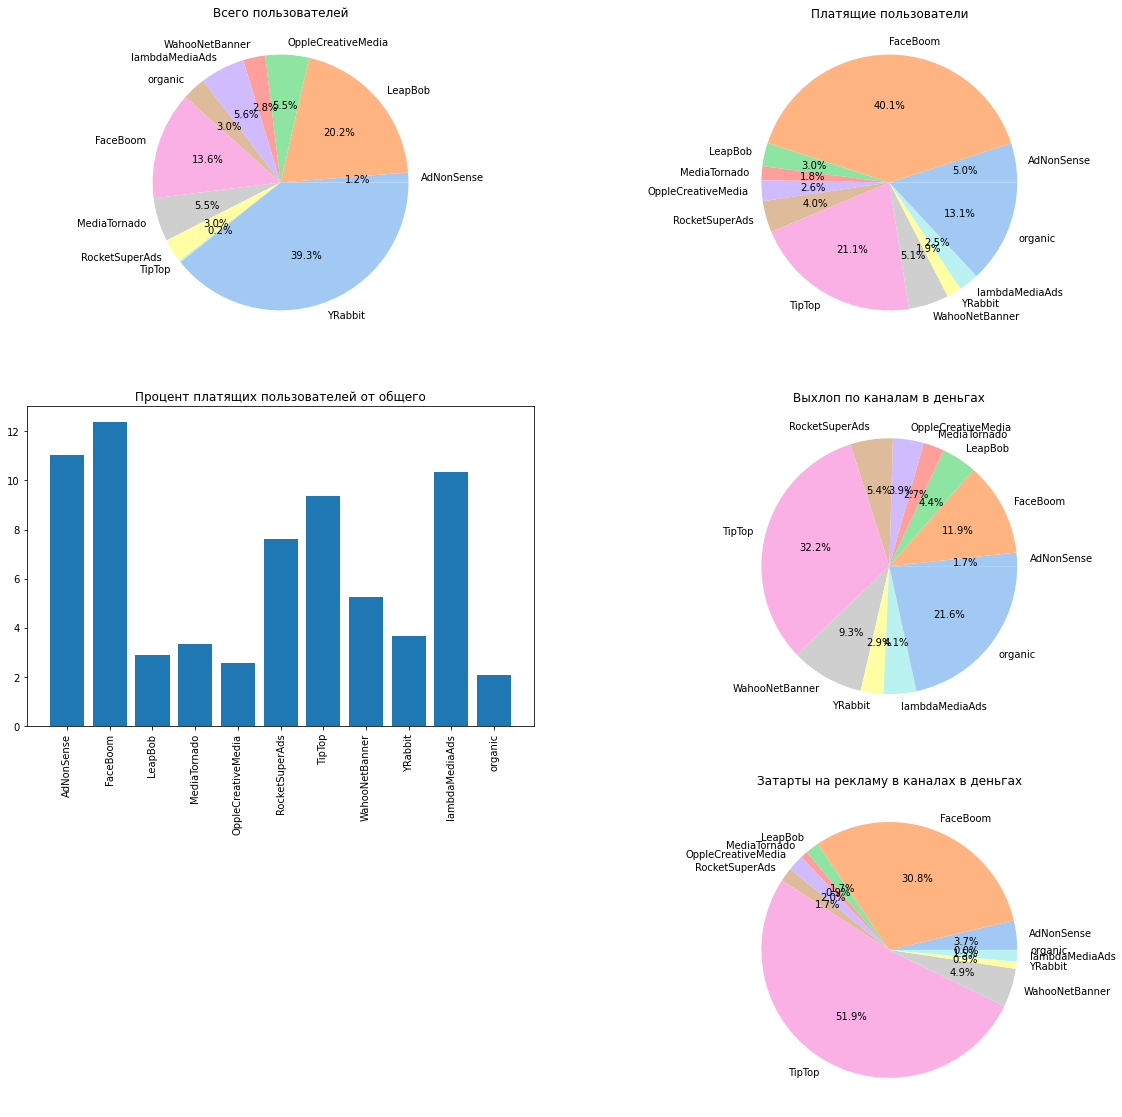

In [47]:
fig = plt.figure(figsize=(20,20))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(3,2,1)
plt.pie(
    x = z.groupby('channel')['%_count_all'].sum(),
    labels = z['channel'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(3,2,2)
plt.pie(
    x = z.pivot_table(index='channel', values=z.columns[5][0], aggfunc='sum').reset_index()['payer'],
    labels = z.pivot_table(index='channel', values=z.columns[5][0], aggfunc='sum').reset_index()['channel'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax3 = fig.add_subplot(3,2,3)
plt.bar(
    x = z.pivot_table(index='channel', values=z.columns[6][0], aggfunc='sum').reset_index()['channel'],
    height = z.pivot_table(index='channel', values=z.columns[6][0], aggfunc='median').reset_index()['']
)
plt.xticks(rotation=90)
plt.title('Процент платящих пользователей от общего')

ax4 = fig.add_subplot(3,2,4)
plt.pie(
    x = profiles.pivot_table(index='channel', values='revenue', aggfunc='sum').reset_index()['revenue'],
    labels = profiles.pivot_table(index='channel', values='revenue', aggfunc='sum').reset_index()['channel'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Выхлоп по каналам в деньгах')

ax5 = fig.add_subplot(3,2,6)
plt.pie(
    x = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum').reset_index()['acquisition_cost'],
    labels = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum').reset_index()['channel'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Затарты на рекламу в каналах в деньгах')



plt.show()

##    Вывод по данным срезам:
    
    1 Большинство пользователей 68% с сша, большинтсов платящих пользователей 77% так же из США. Примерно 4-7% пользователей у нас переходят в платящие, в сша это 7%, в франц, бритов и немцев это  4-5%.
    Доход по странам распределяется так же как и платящие пользователи
    Затраты на рекламу по странам распределяется так же как и платящие пользователи
    
    2 По девайсам 40% пользователей с айфоном, 40% платящих пользователей тоже с айфоном. Перех в плятящие почти одинаковый у всех 4,5%
    Доход по девайсам распределяется так же как и платящие пользователи
    Затраты на рекламу по девайсам распределяется так же как и платящие пользователи
    
    3 По каналам привлечения 13% привлеченных клиентов с FaceBoom дают нам 40% платящих клиентов
      0,2% привлеченных клиентов с TipTop дают нам 21% платящих клиентов
      3% привлеченных  Organic дают нам 13.1% платящих клиентов      
      т.е 16,2% клиентов привлеченных через organic, tiptop и faceboom дают нам 74,1% платящих клиентов! Это 66% всех доходов
      Основные затраты приходятся на tiptop 52% и faceboom 31% это приносит нам 13,8 всех пользователей и 61% платящих пользовтаелей и 44% доходов

In [56]:
profiles

,user_id,channel,device,region,session_start,month,dt,payer,count_user_id,costs,acquisition_cost,revenue
0,382394863972,MediaTornado,Mac,United States,2019-05-01 00:00:41,2019-05-01,2019-05-01,False,26,6.24,0.240000,NaN
1,428935481941,AdNonSense,PC,UK,2019-05-01 00:01:35,2019-05-01,2019-05-01,False,39,40.95,1.050000,NaN
2,86266511938,organic,Android,Germany,2019-05-01 00:02:38,2019-05-01,2019-05-01,False,519,NaN,NaN,NaN
3,763000657462,organic,PC,UK,2019-05-01 00:04:21,2019-05-01,2019-05-01,False,519,NaN,NaN,NaN
4,791058813280,LeapBob,Android,France,2019-05-01 00:05:17,2019-05-01,2019-05-01,False,12,2.52,0.210000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
150003,598664469855,AdNonSense,iPhone,UK,2019-10-27 23:55:23,2019-10-01,2019-10-27,False,35,35.70,1.020000,NaN
150004,18615786610,organic,Android,Germany,2019-10-27 23:55:42,2019-10-01,2019-10-27,False,362,NaN,NaN,NaN
150005,430005587232,OppleCreativeMedia,PC,Germany,2019-10-27 23:56:13,2019-10-01,2019-10-27,False,69,17.75,0.257246,NaN
150006,350809890323,TipTop,iPhone,United States,2019-10-27 23:58:24,2019-10-01,2019-10-27,False,170,588.00,3.458824,NaN
